In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from IPython.core.pylabtools import figsize
figsize(10, 10) # зададим размер картинки
data = pd.read_csv('D:\MLlabs\heart.csv', sep=',')


Подготовим данные, как в прошлый раз



In [47]:
data = data.drop(['Unnamed: 0'], axis='columns')
data = data.drop(['oldpeak'], axis='columns')

def gender_oppression(gender):
    if gender == 'male':
        return 1
    return 0

data['sex'] = data['sex'].apply(gender_oppression)

def chest(pain):
    if pain == 'light':
        return 0
    if pain == 'medium':
        return 1
    if pain == 'hard':
        return 2
    if pain == 'very hard':
        return 3
    return 4

data['cp'] = data['cp'].apply(chest)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0,0,2,1
2,41,0,1,130,204,0,0,172,0,2,0,2,1
3,56,1,1,120,236,0,1,178,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,2,0,2,1



Поделим выборку

In [48]:
X = data[data.columns[:-1]]
y = data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

СТРУКТУРА ДАННЫХ
Посмотрим на распределения и возможные зависимости признаков.

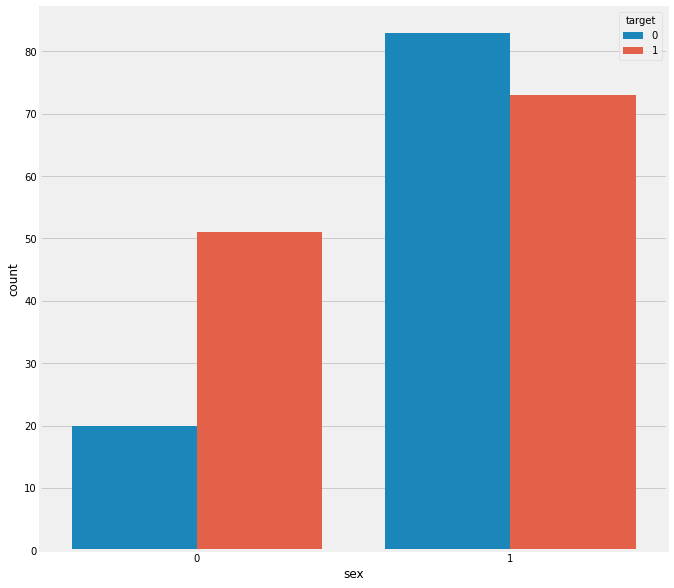

In [49]:
sns.countplot(X_train['sex'], hue=y_train)


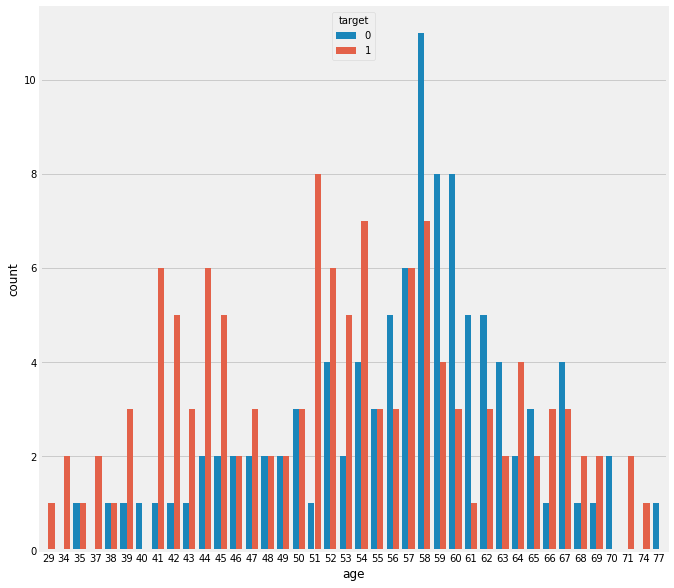

In [50]:
sns.countplot(X_train['age'], hue=y_train)

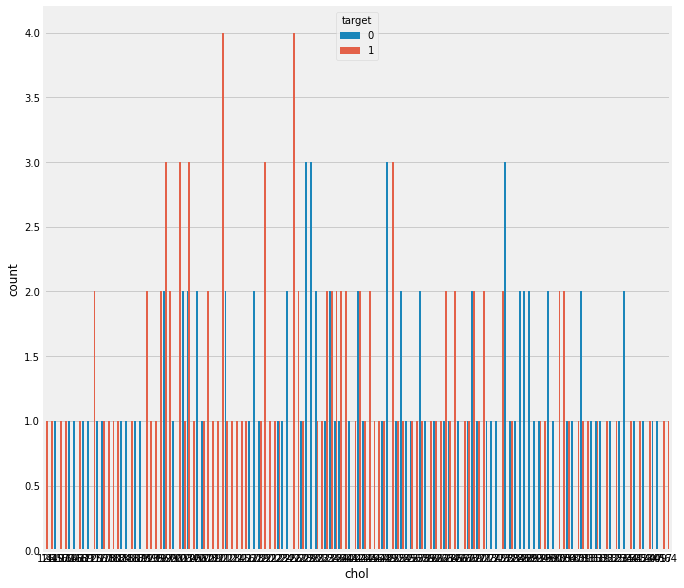

In [51]:
sns.countplot(X_train['chol'], hue=y_train)

Видим, что у женщин больше болеющих чем неболеющих, а у мужчин наоборот, однако болеющих мужчин больше, чем женщин.
Также наблюдаем, что  людей возрастом до 54 лет имеющих заболевание больше чем неимеющих. Людей имеющих заболевание с возрастом от 55 до 63 лет столько же или меньше, чем не имеющих заболевание.
В возрасте от 64 лет встречаются разные данные.
С холестерином дела обстоят примерно в равной пропорции за исключением некоторых отклонений.


Наши переменные не дают точной оценки, имеются ли у пациента проблемы с сердцем. 

А как же распределены признаки друг относительно друга?

<ipython-input-52-8eae8ccb8845>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_pairgrid['target'] = y_train


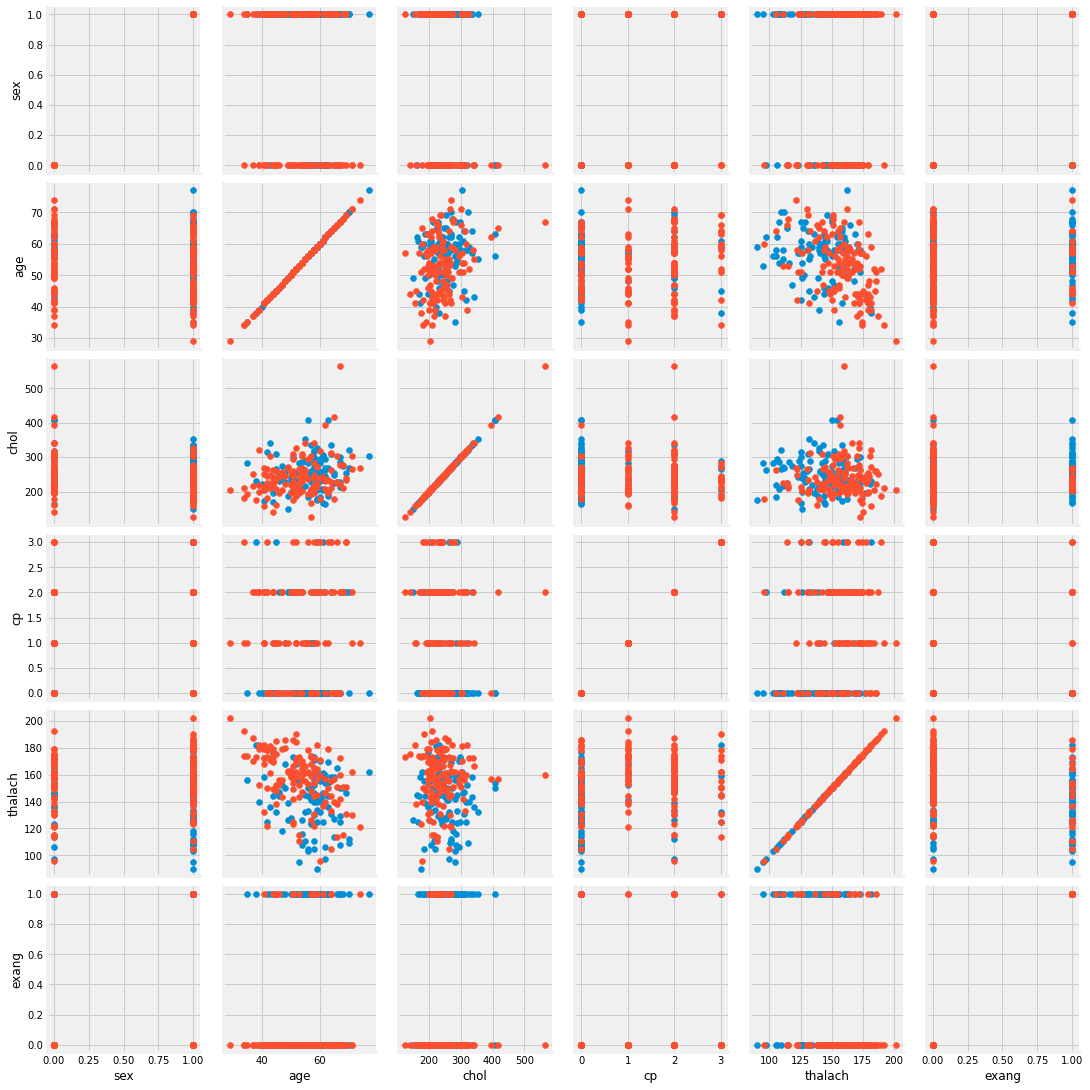

In [52]:
df_for_pairgrid = X_train[['sex', 'age', 'chol', 'cp', 'thalach', 'exang' ]]
df_for_pairgrid['target'] = y_train

sns.PairGrid(df_for_pairgrid, hue='target').map(plt.scatter)

ВЫБРОСЫ

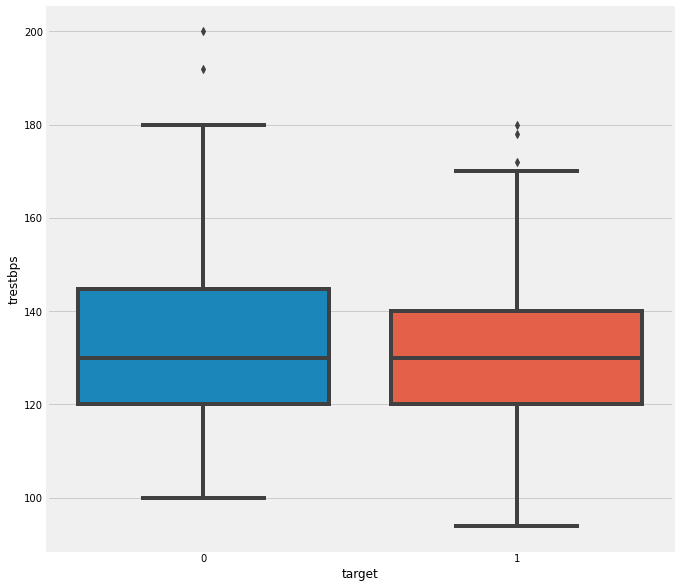

In [53]:
writingscore = pd.read_csv('D:\MLlabs\heart.csv', sep=',')['trestbps'].apply(lambda x: x if x >= 0 else x / 500)
sns.boxplot(x=y, y=writingscore)

А на графике-скрипке можно посмотреть еще и на плотность распределения величины.

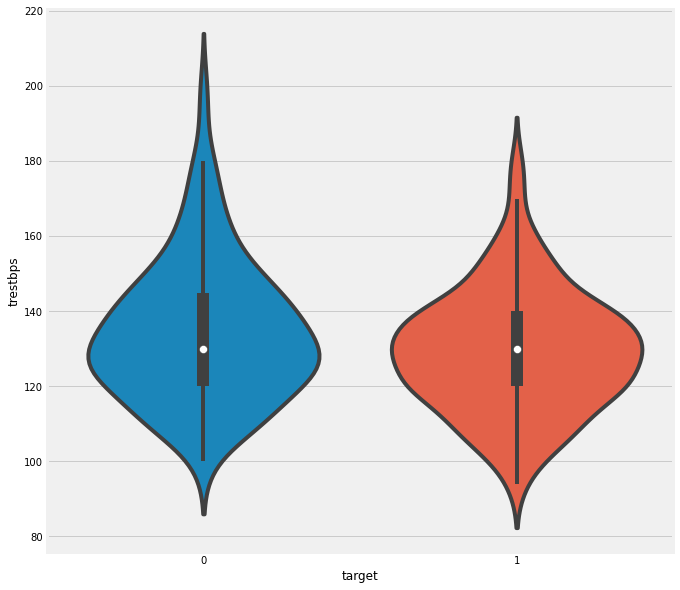

In [54]:
sns.violinplot(x=y, y=writingscore)

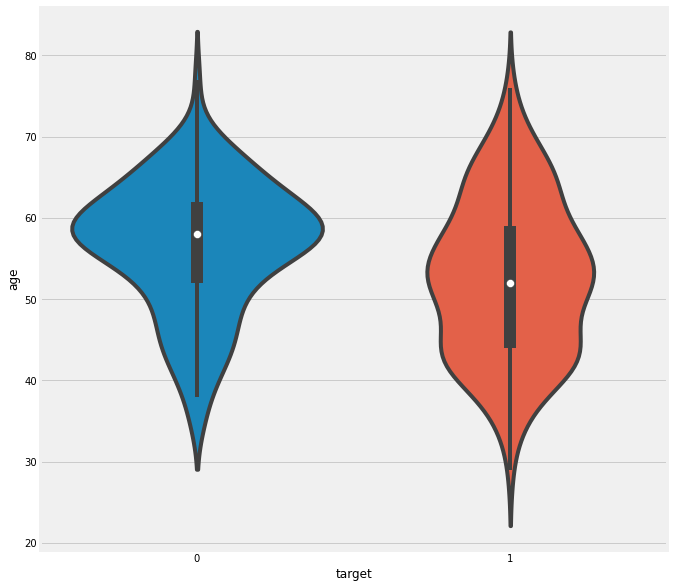

In [55]:
writingscore = pd.read_csv('D:\MLlabs\heart.csv', sep=',')['age'].apply(lambda x: x if x >= 0 else x / 500)
sns.violinplot(x=y, y=writingscore)

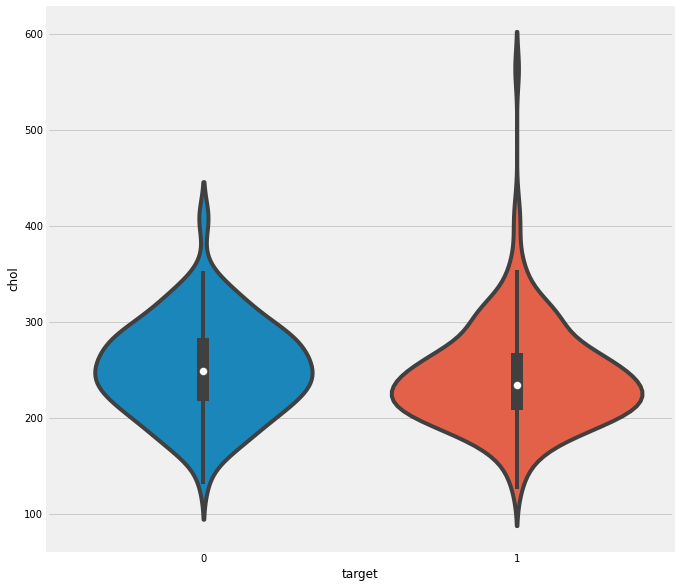

In [56]:
writingscore = pd.read_csv('D:\MLlabs\heart.csv', sep=',')['chol'].apply(lambda x: x if x >= 0 else x / 500)
sns.violinplot(x=y, y=writingscore)

График-скрипка подтверждает вывод сделанный выше относительно болеющих людей разных возрастов. 
Неболеющих людей с холестерином выше 450 не наблюдается.

Нормализация

Качество алгоритма до нормализации: 0.618421052631579
Качество алгоритма после нормализации: 0.8026315789473685


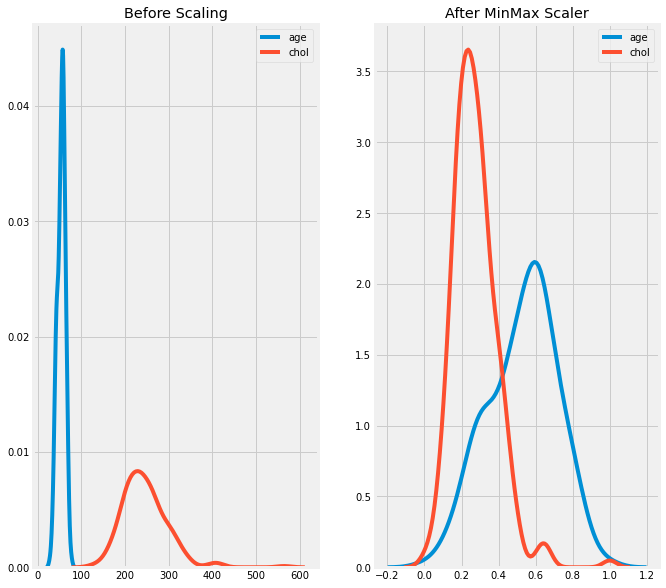

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

print("Качество алгоритма до нормализации:",
      KNeighborsClassifier(n_neighbors=14).fit(X_train, y_train).score(X_test, y_test))

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train, ), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

print("Качество алгоритма после нормализации:",
      KNeighborsClassifier(n_neighbors=14).fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

# графики
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['age'], ax=ax1)
sns.kdeplot(X_train['chol'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(X_train_scaled['age'], ax=ax2)
sns.kdeplot(X_train_scaled['chol'], ax=ax2)
plt.show()

В нашем случае нормализация значительно увеличила точность 

ПОДБОР АЛГОРИТМА

Не всегда можно понять по визуализации данных, какой алгоритм может хорошо сработать. Чтобы понять, над какой моделью можно работать, посмотрим на качество на нескольких простых моделях.

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
    print(clf.__class__.__name__, clf.fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

DecisionTreeClassifier 0.7763157894736842
SGDClassifier 0.8421052631578947
SVC 0.8421052631578947
GaussianNB 0.8421052631578947
KNeighborsClassifier 0.8026315789473685


Метод опорных векторов показал наилучший результат.

ПРО СТРАТИФИКАЦИЮ

Посмотрим на распределение классов в тренировочной выборке.

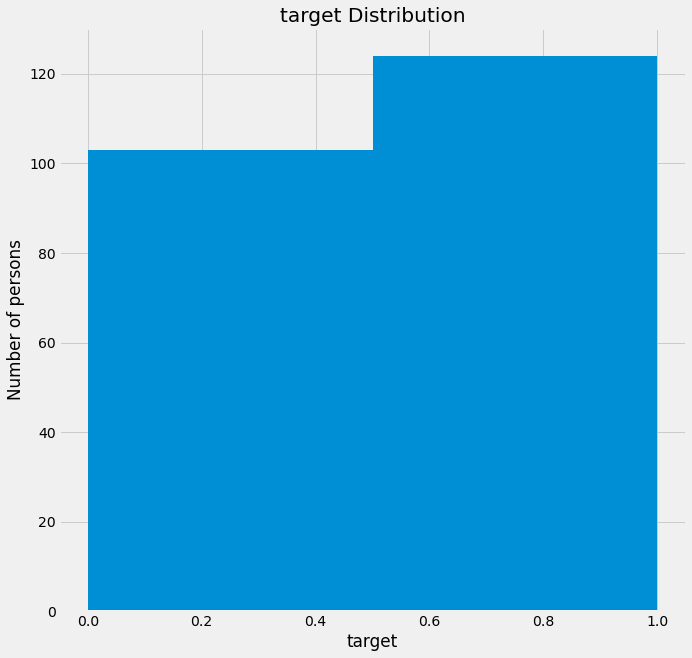

In [59]:
plt.style.use('fivethirtyeight')
plt.hist(y_train, bins=2);
plt.xlabel('target'); plt.ylabel('Number of persons');
plt.title('target Distribution');

In [60]:
print(y_train.value_counts())

disease_count = y_train.gt(0.8).sum(axis=0)
healthy_count =  y_train.lt(0.8).sum(axis=0)

print('\nDisease part:', disease_count/ (disease_count + healthy_count))

1    124
0    103
Name: target, dtype: int64

Disease part: 0.5462555066079295


Заметим, что соотношение 54/46%. Здесь нет явного преобладания одного значения, клонирование недоминантного класса не имеет смысла.

Увеличим количество примеров из недоминантного класса.

МЕТРИКИ КАЧЕСТВА

Посмотрим на предсказания константного классификатора

In [61]:
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=14).fit(X_train, y_train)
a = clf.predict(X_test)


accuracy_score_result = accuracy_score(y_true=y_test, y_pred=a)

print('Accuracy score:', accuracy_score_result)

Accuracy score: 0.618421052631579


Задача 1
Необходимо предсказать всех, кто будет иметь болезнь. Нельзя допустить чтобы человеку не поставили правильно диагноз о болезни. Для этого воспользуемся метрикой recall = TP/(TP + FN). В таком случае задачу надо ставить так: максимизируем recall , при precision не менее определенного значения. (Не критично если человеку поставят диагноз, а он не болеет)

In [63]:

from sklearn.metrics import recall_score

rec_score = recall_score(y_true=y_test, y_pred=a)

print('Recall score:', rec_score)

Recall score: 0.6097560975609756


Задача 2
Предположим другой вариант. Теперь нельзя поставить диагноз болен человеку который не болеет (иначе он посадит себе здоровье во время лечения).В таком случае необходимо использовать precision = TP / (TP + FP)

In [64]:
from sklearn.metrics import precision_score

prec_score = precision_score(y_true=y_test, y_pred=a)

print('Precision score:', prec_score)

Precision score: 0.6578947368421053



Выбор метрики зависит от задачи заказчика. Для случаев представленных выше требуются разные метрики. Есть метрика которая учитывает precision и recall в одной формуле - F-мера:

In [65]:

B = 0.5

F_score = (1 + B**2) * ( 2 * prec_score * rec_score) / (prec_score * B**2 + rec_score)

print('F_score(B=0.5)', F_score)

F_score(B=0.5) 1.2953367875647668


In [66]:
B = 2

F_score = (1 + B**2) * ( 2 * prec_score * rec_score) / (prec_score * B**2 + rec_score)

print('F_score(B=2)', F_score)

F_score(B=2) 1.2376237623762374


Параметр B принимает значения в диапазоне 0 < B < 1 если вы хотите отдать приоритет precision, а при B>1 приоритет отдается recall

In [67]:
from sklearn.metrics import precision_recall_curve

pr, rec, _ = precision_recall_curve(y_test, a)
print('PRC AUC:', auc(rec, pr))

PRC AUC: 0.7390885750962773


In [68]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test, a)
print('ROC AUC:', roc)

ROC AUC: 0.619163763066202
